# Line to circle

The idea is to join a line to a circle with a curve which:

* connect with a tangent on both sides
* allow a smooth curvature transition,
* and has a well-defined analytical expression.

The clotoid is not a good candidate here since the only formulation is given by an integration over the curvilinea abscissa $L$:

$$ \begin{align}
    x(L) &=\int_0^L\cos(s^2) \, ds \\
    y(L) &= \int_0^L\sin(s^2) \, ds
\end{align} $$

Even if many solutions exists to compute some approximations of the clotoid, here I chose another curve which have a variable curvature while being well defined: $\sin$

In [1]:
import math

import numpy as np
import matplotlib.pyplot as plt

import sympy
from sympy import symbols as sym

The sine function is written as a parametric function of the time. In order to have a generic expression of the curvature:

$$ k = \frac{x'y''-y'x''}{\left({x'}^2+{y'}^2\right)^\frac32} $$

In [15]:
t = sym('t')


# the parametric definition of sine
x0 = t
y0 = sympy.sin(t)

# the first order derivative
x1 = sympy.diff(x0, t)
y1 = sympy.diff(y0, t)

# the second order derivative
x2 = sympy.diff(x1, t)
y2 = sympy.diff(y1, t)

k0 = (x1*y2 - y1*x2)/(x1**2 + y1**2)**sympy.Rational(2,3)
k1 = sympy.diff(k0, t)

The curvature is given by :
    
$$ k(t) = - \frac{\sin{\left(t \right)}}{\left(\cos^{2}{\left(t \right)} + 1\right)^{\frac{2}{3}}} $$


And the derivative of the curvature by

$$ k'(t) = - \frac{\cos{\left(t \right)}}{\left(\cos^{2}{\left(t \right)} + 1\right)^{\frac{2}{3}}} - \frac{4 \sin^{2}{\left(t \right)} \cos{\left(t \right)}}{3 \left(\cos^{2}{\left(t \right)} + 1\right)^{\frac{5}{3}}}
$$

Which can be plotted easily. We see that the curvature varies from 0 to 1, crossing zero for $t = 0$

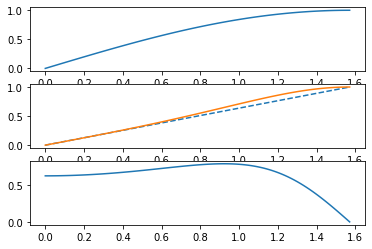

In [3]:
t_lst = np.linspace(0, math.pi/2, 100)

y0_lst = [y0.subs({'t': i}) for i in t_lst]
k0_lst = [float(abs(k0.subs({'t': i}))) for i in t_lst]
k1_lst = [float(abs(k1.subs({'t': i}))) for i in t_lst]

plt.subplot(3,1,1)
plt.plot(t_lst, y0_lst)
plt.subplot(3,1,2)
plt.plot(t_lst, 2*t_lst/math.pi, '--')
plt.plot(t_lst, k0_lst)
plt.subplot(3,1,3)
plt.plot(t_lst, k1_lst)
plt.show()

The quarter of a sine function can then be used to connect a line to a circle, as show here :

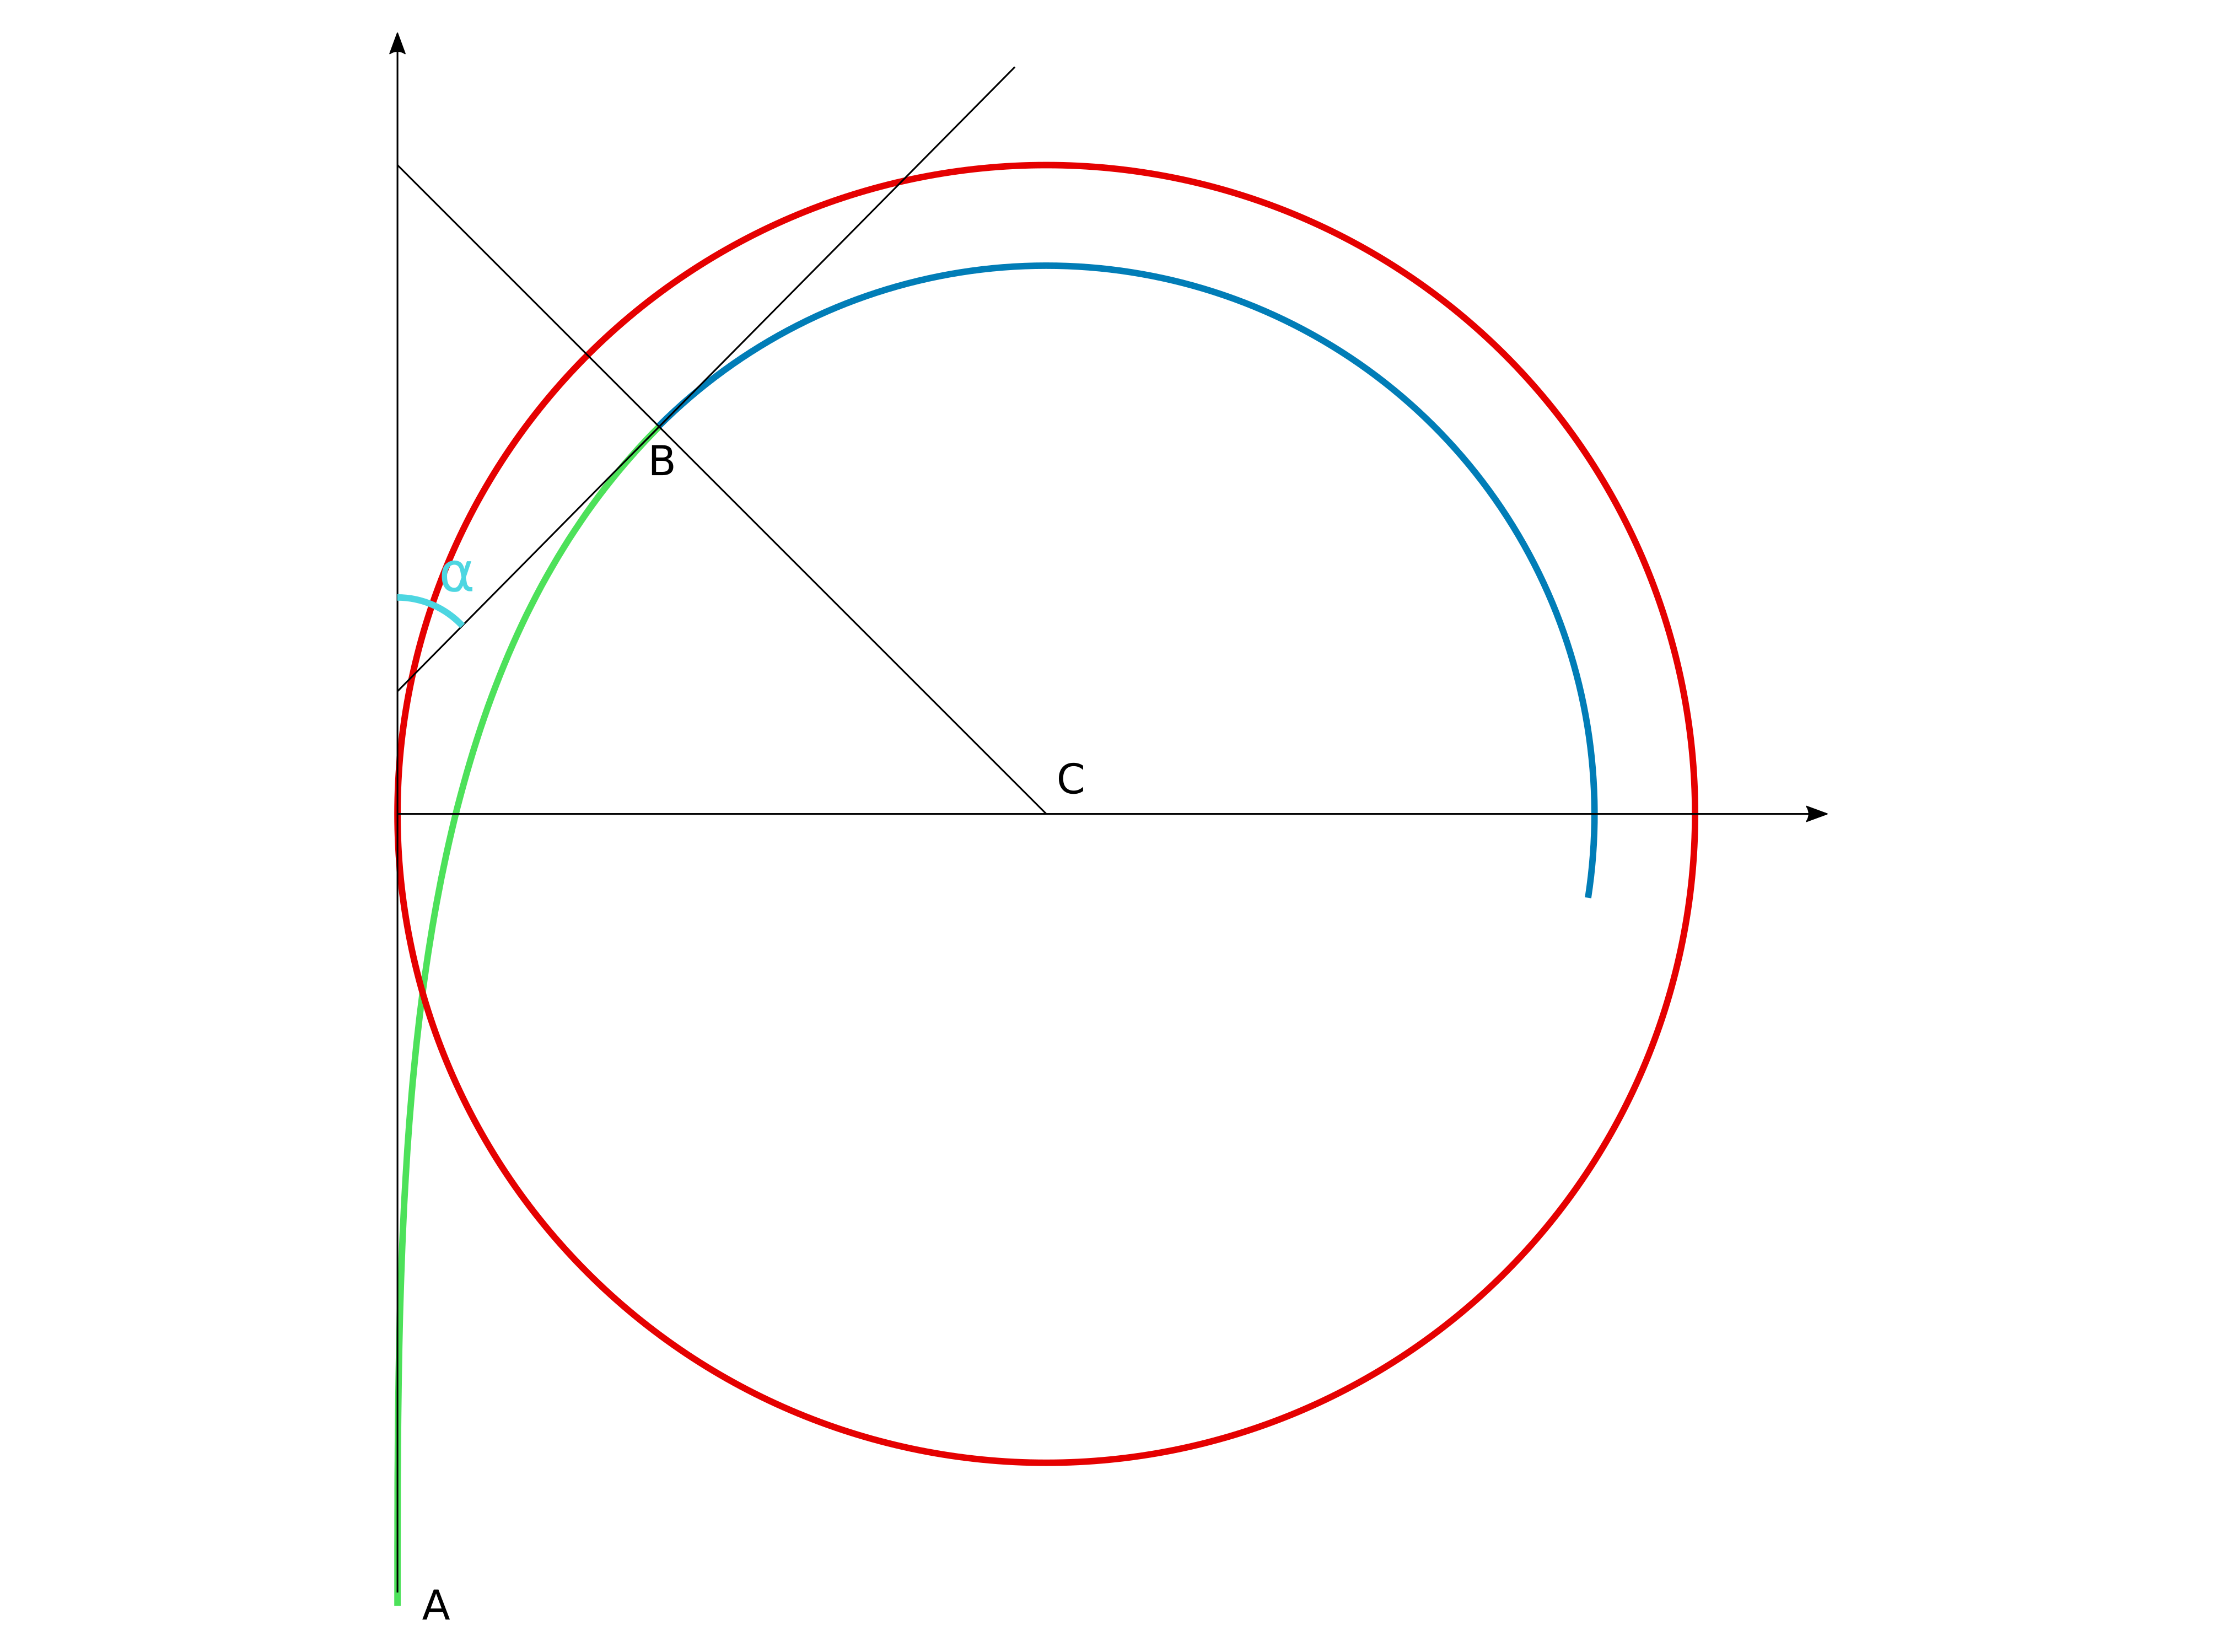

Let be a circle of center $C$ and radius $r$ (the red one). This circle pass through the origin. The question is how to catch the blue circle of center $C$ and radius unknown, such as:

* the tangent of the green curve in $B$ coincide with the tangent to the blue circle in $B$
* the curvature of the green curve in $B$ equals the curvature of the blue circle.

Since the sine function tangent the first bissector and that we want it to tangent $Oy$, the first step is to rotate the previous definition of the parametric fonction by $\theta = \frac{\pi}{4}$

In [4]:
theta = sympy.pi / 4

xs = x0 * sympy.cos(theta) - y0 * sympy.sin(theta)
ys = x0 * sympy.sin(theta) + y0 * sympy.cos(theta)

This gives a new parametric function:
    
$$ \begin{align}
x_S(t) &= \frac{\sqrt{2} t}{2} - \frac{\sqrt{2} \sin{\left(t \right)}}{2} \\
y_S(t) &= \frac{\sqrt{2} t}{2} + \frac{\sqrt{2} \sin{\left(t \right)}}{2}
\end{align}
$$

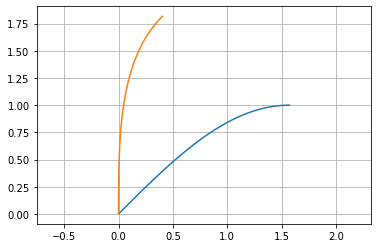

In [5]:
x0_lst = [float(x0.subs({'t':i})) for i in t_lst]
y0_lst = [float(y0.subs({'t':i})) for i in t_lst]

xs_lst = [float(xs.subs({'t':i})) for i in t_lst]
ys_lst = [float(ys.subs({'t':i})) for i in t_lst]

plt.plot(x0_lst, y0_lst)
plt.plot(xs_lst, ys_lst)
plt.grid()
plt.axis('equal')
plt.show()

# print('M 0, 297 ' + ' '.join(f'L {100 * x:0.2f},{297 - 100 * y:0.2f}' for x, y in (zip(xs_lst, ys_lst))))

We can then compute $\alpha$, the angle made by the tangent in $B$ and the verical axis

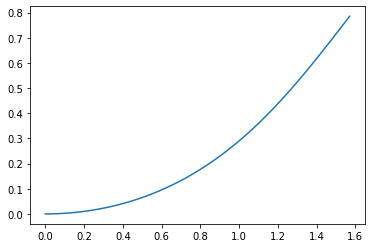

In [6]:
alpha = sympy.pi / 4 - sympy.atan(y1 / x1)

alpha_lst = [float(alpha.subs({'t':i})) for i in t_lst]

plt.plot(t_lst, alpha_lst)
plt.show()

But $\alpha$ is also the angle made by the radius $BC$ which is perpendicular to the tangent in $B$ and the horizontal axis. We know tha A lies on the vertical axis, but we don't know at which height yet. We also know $B$ is on the radius $BC$, so to position of B can be deduced:

$$ \begin{align}
x_B(t) &= r \left(1 - \sin{\left(\operatorname{atan}{\left(\cos{\left(t \right)} \right)} + \frac{\pi}{4} \right)}\right) \\
y_B(t) &= r \cos{\left(\operatorname{atan}{\left(\cos{\left(t \right)} \right)} + \frac{\pi}{4} \right)}
\end{align}
$$


In [16]:
rd, rb = sym('r_D r_B')

xb = rd - rb * sympy.cos(alpha)
yb = rb * sympy.sin(alpha)

In [17]:
rb = sympy.solve(sympy.Eq(xb, xs), rb)[0]

if we define $r_B = BC$, then the radius of the blue circle can be expressed as a function of $x_B$ and $y_B$:

$$ r_B (t) = \frac{2 r_{D} - \sqrt{2} t + \sqrt{2} \sin{\left(t \right)}}{2 \sin{\left(\operatorname{atan}{\left(\cos{\left(t \right)} \right)} + \frac{\pi}{4} \right)}}
$$


In [33]:
xb = rd - rb * sympy.cos(alpha)
yb = rb * sympy.sin(alpha)

Now, we just have to find a t for which $1 / r_B(t) = k_0(t)$

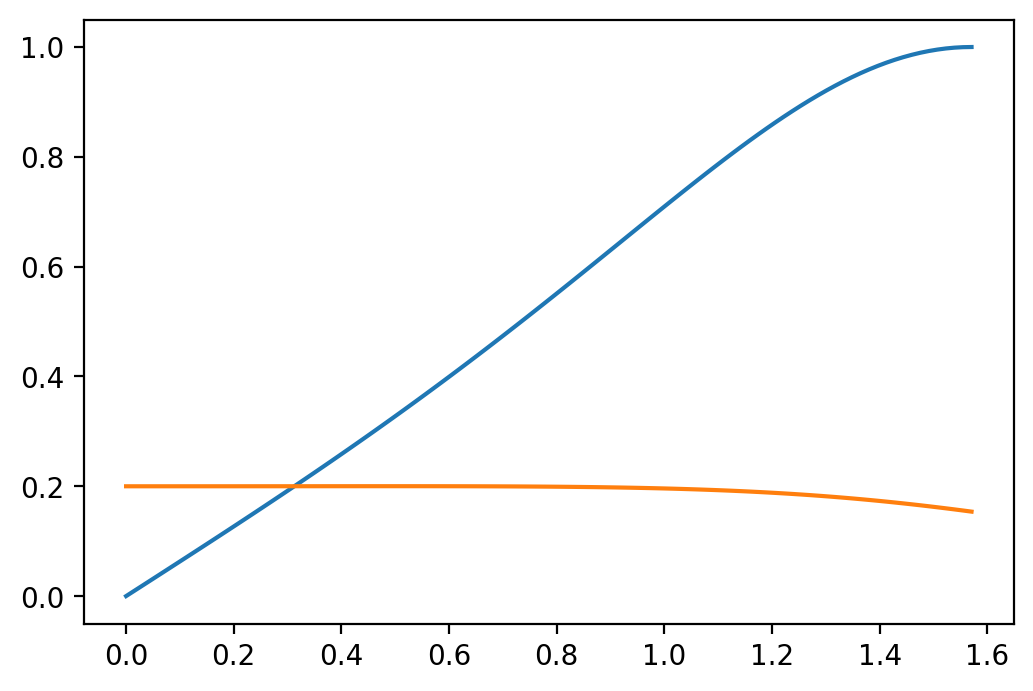

In [34]:
rb_lst = [float(1 / rb.subs({'t':i, 'r_D':5})) for i in t_lst]

plt.plot(t_lst, k0_lst)
plt.plot(t_lst, rb_lst)
plt.show()

-------

# Verification



In [22]:
import ipywidgets
from ipywidgets import interact_manual

plt.rcParams['figure.dpi'] = 200

In [31]:
r_val = 5
w_lst = np.linspace(-math.pi + 0.05, -math.pi - 0.05, 100)

rx_lst = [r_val * (1 + math.cos(i)) for i in w_lst]
ry_lst = [r_val * math.sin(i) for i in w_lst]

@interact_manual(t_int=ipywidgets.IntSlider(min=0, max=100, step=1, value=25))
def plot(t_int) :
    t_lst = np.linspace(0, t_int / 100, t_int)
    print(t_lst[-1])

    xb_lst = [float(xb.subs({'t':i, 'r_D':r_val})) for i in t_lst]    
    yb_lst = [float(yb.subs({'t':i, 'r_D':r_val})) for i in t_lst]

    xs_lst = np.array([float(xs.subs({'t':i, 'r_D':r_val})) for i in t_lst])
    xs_lst = xs_lst - xs_lst[-1] + xb_lst[-1]
    
    ys_lst = np.array([float(ys.subs({'t':i, 'r_D':r_val})) for i in t_lst])
    ys_lst = ys_lst - ys_lst[-1] + yb_lst[-1]
   
    plt.plot(rx_lst, ry_lst, 'red')
    plt.plot(xs_lst, ys_lst, 'green')
    
    plt.plot(xb_lst, yb_lst)
        
    # plt.axis('equal')
    plt.grid()
    plt.show()
    

interactive(children=(IntSlider(value=25, description='t_int'), Button(description='Run Interact', style=Butto…

## brouillon

In [ ]:
alpha_local = sympy.pi / 6
xd = sym('x_d')
yd = (r - xd) * sympy.tan(alpha_local)
xd_lst = np.linspace(0, 5, 100)

yd_lst = [float(yd.subs({'r':3, 'alpha': sympy.pi / 4, 'x_d': i})) for i in xd_lst]
plt.plot(xd_lst, yd_lst)
plt.grid()
plt.axis('equal')
plt.plot()

In [ ]:
yd = (r - xd) * sympy.tan(alpha)
yd

In [ ]:
yd.subs({'x_d': qx})

In [ ]:
angle = sympy.pi / 4 - sympy.atan(q1v / q1u)

t_lst = np.linspace(0, math.radians(90.0), 100)
angle_lst = [float(angle.subs({'t':i})) for i in t_lst]
plt.plot(t_lst, angle_lst)
plt.show()

angle

lorsque t varie, il devrait arriver un moment ou l'arc est correct pour un cercle éventuellement un peu plus petit

In [ ]:
gamma = sym('gamma')
sol = sympy.solve(angle - gamma, t)
# print(float(sol[0]), float(sol[1]))
sol[1].simplify()

si on dit que l'idée est de s'accrocher après un 16ème de cercle, soit pi/8

In [ ]:
gamma = 0.0

t_gamma = sympy.acos(gamma)

In [ ]:
qx_gamma = qx.subs({'t' : t_gamma})
qy_gamma = qy.subs({'t' : t_gamma})

In [ ]:
qx_gamma

In [ ]:
qy_gamma

In [ ]:
print(float(qx_gamma), float(qy_gamma))

In [ ]:
t = sym('t')

In [ ]:
c0x = t
c1x = sympy.diff(c0x, t)
c2x = sympy.diff(c1x, t)

In [ ]:
c0y = sympy.sin(t)
c1y = sympy.diff(c0y, t)
c2y = sympy.diff(c1y, t)

In [ ]:
t_lst = np.linspace(0, math.radians(90.0), 100)
x_lst = [float(c0x.subs({'t':u})) for u in t_lst]
y_lst = [float(c0y.subs({'t':u})) for u in t_lst]

plt.subplot(3,1,1)
plt.plot(x_lst)
plt.subplot(3,1,2)
plt.plot(y_lst)
plt.subplot(3,1,3)
plt.plot(x_lst, y_lst)
plt.show()


In [ ]:
k0 = (c1x * c2y - c1y * c2x) / ((c1x ** 2 + c1y **2) ** sympy.Rational(2, 3))
k0

In [ ]:
k1 = sympy.diff(k0, t)
k1

In [ ]:
t_lst = np.linspace(-2*math.radians(90.0), math.radians(90.0), 100)

c0x_lst, c0y_lst = list(), list()
k0_lst, k1_lst = list(), list()

for u in t_lst :
    time = {'t': u}
    c0x_lst.append(float( c0x.subs(time) ))
    c0y_lst.append(float( c0y.subs(time) ))
    k0_lst.append(float( k0.subs(time) ))
    k1_lst.append(float( k1.subs(time) ))

In [ ]:
plt.plot(c0x_lst, c0y_lst)
plt.show()

In [ ]:
plt.plot(k0_lst)
plt.show()

In [ ]:
plt.plot(k1_lst)
plt.show()